# Lab 5: Chicago Crash Data

## Academic Integrity Guidelines 
This lab is an individual assignment (like all the other labs). You should NOT work with your project teammate nor any other classmate. If you have questions, please ask us on Piazza.
You must reference (including URLs) of any resources other than those linked to in the assignment, or provided by the professor or TA. 

We will run your code through MOSS software to detect copying and plagiarism.


##To submit this assignment:
1.	Print your Jupyter Notebook as a PDF and upload it to Gradescope. **Make sure that each line of code has 80 characters maximum and that all your plots and text are properly displayed in the pdf.**
2.	Export your Jupyter Notebook as a python file (.py) and upload it to Gradescope. **If your pdf does not show your text and plots properly, submit your jupyter notebook file also (.ipynb)**


### Exploratory Data Analysis (EDA) of Chicago Crash dataset


This lab will have you doing exploratory data analysis in on a real-world dataset (source: [Chicago open data](https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if)). The goal is to get fluent in working with the standard tools and techniques of exploratory data analysis, by working with a dataset where you have some basic sense of familiarity.
This project is based on Chicago Crash Data available to the public. You should explore the data and uncover interesting observations. Make sure to have your code documented with proper comments and the exact sequence of operations you needed to produce the resulting tables and figures.


#### Data set

You are to download the Chicago Crash Data and perform various EDA tasks on it. You can download the data by accessing [this link](https://drive.google.com/uc?export=download&id=1hljHY3xBgYR7wYUDy6ksi-I-3VdIFI9X).
The original data set is available on Chicago Open Data but the original data includes more attributes and fields that are no necessary.
Here’s the data set description from the original website:


>  *Crash data shows information about each traffic crash on city streets within the City of Chicago limits
and under the jurisdiction of Chicago Police Department (CPD). Data are shown as is from the electronic
crash reporting system (E-Crash) at CPD, excluding any personally identifiable information. Records are
added to the data portal when a crash report is finalized or when amendments are made to an existing
report in E-Crash. Data from E-Crash are available for some police districts in 2015, but citywide data
are not available until September 2017. About half of all crash reports, mostly minor crashes, are selfreported
at the police district by the driver(s) involved and the other half are recorded at the scene by
the police officer responding to the crash. Many of the crash parameters, including street condition data,
weather condition, and posted speed limits, are recorded by the reporting officer based on best available
information at the time, but many of these may disagree with posted information or other assessments
on road conditions. If any new or updated information on a crash is received, the reporting officer may
amend the crash report at a later time. A traffic crash within the city limits for which CPD is not the responding
police agency, typically crashes on interstate highways, freeway ramps, and on local roads along
the City boundary, are excluded from this dataset. As per Illinois statute, only crashes with a property
damage value of $1,500 or more or involving bodily injury to any person(s) and that happen on a public
roadway and that involve at least one moving vehicle, except bike dooring, are considered reportable
crashes. However, CPD records every reported traffic crash event, regardless of the statute of limitations,
and hence any formal Chicago crash dataset released by Illinois Department of Transportation may not
include all the crashes listed here.*



This is a large dataset with many fields. Here is a list of all attributes included:


| **Column Name**             | **Description**                                                                                                                                                             | **Type**    |
|-----------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| CRASH-RECORD-ID             | Unique identifier for the record                                                                                                                                            | Number      |
| CRASH-DATE                  | Date and time of crash as entered by the officer                                                                                                                            | Date & Time |
| POSTED-SPEED-LIMIT          | Posted speed limit                                                                                                                                                          | Number      |
| TRAFFIC-CONTROL-DEVICE      | Traffic control device present at crash location                                                                                                                            | Plain Text  |
| WEATHER-CONDITION           | Weather condition at time of crash                                                                                                                                          | Plain Text  |
| LIGHTING-CONDITION          | Light condition at time of crash                                                                                                                                            | Plain Text  |
| FIRST-CRASH-TYPE            | Type of first collision in crash                                                                                                                                            | Plain Text  |
| TRAFFIC WAY-TYPE            | Traffic way type                                                                                                                                                            | Plain Text  |
| ROADWAY-SURFACE-COND        | Road surface condition                                                                                                                                                      | Plain Text  |
| ROAD-DEFECT                 | Road defects                                                                                                                                                                | Plain Text  |
| CRASH-TYPE                  | A general severity classification for the crash. Can be either Injury and/or Tow Due to Crash or No Injury / Drive Away                                                     | Plain Text  |
| INTERSECTION-RELATED        | A field observation by the police officer whether an intersection played a role in the crash. Does not represent whether or not the crash occurred within the intersection. | Plain Text  |
| NOT-RIGHT-OF-WAY            | Whether the crash begun or first contact was made outside of the public right-of-way                                                                                        | Plain Text  |
| HIT-AND-RUN                 | Crash did/did not involve a driver who caused the crash and fled the scene without exchanging information and/or rendering aid                                              | Number      |
| DAMAGE                      | A field observation of estimated damage.                                                                                                                                    | Plain Text  |
| DATE-POLICE-NOTIFIED        | Calendar date on which police were notified of the crash                                                                                                                    | Date & Time |
| PRIM-CONTRIBUTORY-CAUSE     |                                                                                                                                                                             | Number      |
| NUM-UNITS                   |                                                                                                                                                                             | Number      |
| INJURIES-TOTAL              | Total persons sustaining fatal, incapacitating, non-incapacitating, and possible injuries                                                                                   | Number      |
| INJURIES-FATAL              | Total persons sustaining fatal injuries in the crash                                                                                                                        | Number      |
| INJURIES-INCAPACITATING     | Total persons sustaining incap acitating/serious injuries in the crash                                                                                                      | Number      |
| INJURIES-NON-INCAPACITATING | Total persons sustaining non-incapacitating injuries in the crash                                                                                                           | Number      |
| INJURIES-NO-INDICATION      | Total persons sustaining no injuries in the crash                                                                                                                           | Number      |

# Exercise.

This is an EDA practice, so you need to delve into the data set and identify some useful insights and visualize them.

-  You must include some proper **explanations** for your results. Do not submit a notebook with code cells only. You need to properly describe your methods and discuss/analyze your observations.

-  We will look at the quality of your work for grading. You submission should be coherent and well **documented**.

-  You might find some online discussions and demos on this data set. It is okay if you look them up,
but you must write your own code and analyze the data by yourself and you must add a **references section** at the end indicating any online materials you read.

-  You must have at least one **visualization** for any questions/insight you are investigating.


### 5.1. The data set need cleaning. Decide what to do with missing values and extra attributes. (10 pts)



In [1]:
import pandas as pd

dataframe = pd.read_csv('./Chicago_Crashes.csv')

print(dataframe.columns.values)

# I am getting rid of the CRASH_RECORD_ID column
# This is because the actual value for this column 
# has no real meaning behind it.
# The value for each row is just a bunch for random 
# numbers and letters together.
# This column basically does not have anything to do 
# with relationships with other columns.
dataframe = dataframe.drop(columns=['CRASH_RECORD_ID'])

print(dataframe.columns.values)

['CRASH_RECORD_ID' 'CRASH_DATE' 'POSTED_SPEED_LIMIT'
 'TRAFFIC_CONTROL_DEVICE' 'DEVICE_CONDITION' 'WEATHER_CONDITION'
 'LIGHTING_CONDITION' 'FIRST_CRASH_TYPE' 'TRAFFICWAY_TYPE'
 'ROADWAY_SURFACE_COND' 'ROAD_DEFECT' 'CRASH_TYPE'
 'INTERSECTION_RELATED_I' 'NOT_RIGHT_OF_WAY' 'HIT_AND_RUN_I' 'DAMAGE'
 'DATE_POLICE_NOTIFIED' 'PRIM_CONTRIBUTORY_CAUSE' 'NUM_UNITS'
 'INJURIES_TOTAL' 'INJURIES_FATAL' 'INJURIES_INCAPACITATING'
 'INJURIES_NON_INCAPACITATING' 'INJURIES_REPORTED_NOT_EVIDENT'
 'CRASH_HOUR' 'CRASH_DAY_OF_WEEK' 'CRASH_MONTH']
['CRASH_DATE' 'POSTED_SPEED_LIMIT' 'TRAFFIC_CONTROL_DEVICE'
 'DEVICE_CONDITION' 'WEATHER_CONDITION' 'LIGHTING_CONDITION'
 'FIRST_CRASH_TYPE' 'TRAFFICWAY_TYPE' 'ROADWAY_SURFACE_COND' 'ROAD_DEFECT'
 'CRASH_TYPE' 'INTERSECTION_RELATED_I' 'NOT_RIGHT_OF_WAY' 'HIT_AND_RUN_I'
 'DAMAGE' 'DATE_POLICE_NOTIFIED' 'PRIM_CONTRIBUTORY_CAUSE' 'NUM_UNITS'
 'INJURIES_TOTAL' 'INJURIES_FATAL' 'INJURIES_INCAPACITATING'
 'INJURIES_NON_INCAPACITATING' 'INJURIES_REPORTED_NOT_EVIDENT'
 '

## Your explanations here
The only thing that I cleaned in this section was CRASH_RECORD_ID. This is because this column does not hold any real meaning for any of its values. This is because the values for this columns are just a bunch of random numbers and strings making up a unique identifier for each crash (row). This random identifier does not really need to be in the dataset because it would not form any relationships with other variables.

I was thinking of removing all the rows that have any time of null value for the entire dataset. These null values were primarily in the form of NaN values. However, if I would to remove all the rows with null values in any row, it would remove WAY too much data from the dataset. Instead, I chose to drop rows with null values in specific tasks and assign to new dataframes so I would not lose too much data. I have documented each time I have dropped and cleaned the datasets in all of the tasks in the assignment.

### 5.2. Break down attributes (10 pts)

Some attributes are more useful if you break them into several attributes. An example of this is already included in the data set where the time, day, and month of the crash are given as separate attributes. These attributes allow you to compare crashes based on the day of the week, time, or month (season). 

Are there other attributes that you can break down into smaller attributes to gain more information from?

In [25]:
#your code here
print(dataframe['CRASH_TYPE'])

ct_dataframe = dataframe['CRASH_TYPE']
ct_dataframe = ct_dataframe.str.replace('OR', "")
ct_dataframe = ct_dataframe.str.replace('AND', "")

dataframe[['INJURY_OCCURED',
           'VEHICLE_OUTCOME']] = ct_dataframe.str.split("/",expand=True)

0                   NO INJURY / DRIVE AWAY
1         INJURY AND / OR TOW DUE TO CRASH
2                   NO INJURY / DRIVE AWAY
3                   NO INJURY / DRIVE AWAY
4                   NO INJURY / DRIVE AWAY
                        ...               
481618              NO INJURY / DRIVE AWAY
481619              NO INJURY / DRIVE AWAY
481620              NO INJURY / DRIVE AWAY
481621              NO INJURY / DRIVE AWAY
481622              NO INJURY / DRIVE AWAY
Name: CRASH_TYPE, Length: 481623, dtype: object


## Your explanations here
The attribute that I chose to break down was CRASH_TYPE. This is because after looking at the dataset, I saw that this column has two different values on either side of the slash (/). I first assigned a variable to all the values in the CRASH_TYPE column. I then replaced every occurence of OR and AND with the blank string. This is because I wanted to split CRASH_TYPE into a value before the slash (/) and a value after the slash (/). I wanted the left hand side to just have "NO INJURY" or "INJURY". Then for the right hand side, I wanted it to not include the "NO" before "TOW" just so it could look better. After replacing the OR and AND, I then added two new columns INJURY_OCCURED and VEHICLE_OUTCOME to the dataframe for the lefthand side and righthand side respectively, splitting on the slash (/). This is so I could easily see if there was a injury in the accident or not. I could also see if people drove away or not from the incident.

I was also thinking of splitting the time into smaller parts, but I saw that is was already split. I was also thinking of splitting LIGHTING_CONDITION because there are values that that have two values inside of them. For example, it would be DARKNESS on the left hadn side and then LIGHTED ROAD on the right hand side. However, I decided not to split this comlumn into two seperate columns because the TA said that we only need to split one variable.


### 5.3. Data Analysis question 1. (20 pts)

What are some insights about the crashes and date/time? You can look into season, day of the week, day/night, lightning, weather, etc.




<AxesSubplot: xlabel='DATE_POLICE_NOTIFIED'>

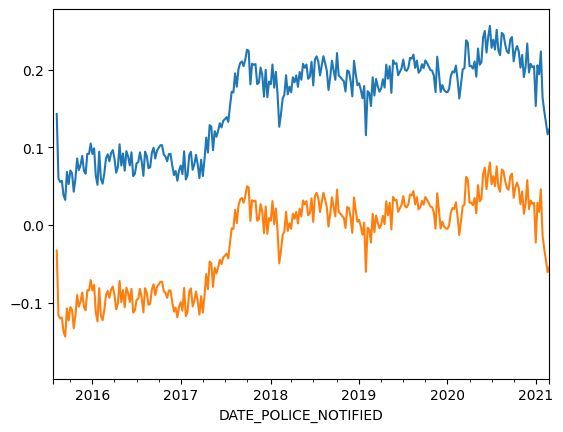

In [26]:
#your code here
# REFERENCE FOR DETRENDING
# https://www.youtube.com/watch?v=aYiUjaxeghk

time_series_df = pd.read_csv('./Chicago_Crashes.csv', 
    parse_dates=['DATE_POLICE_NOTIFIED'], index_col="DATE_POLICE_NOTIFIED")

resampled = time_series_df.INJURIES_TOTAL.resample('W').mean()

resampled.plot()

# Getting rid of all rows that have NaN in them and creating 
# a new dataframe based off this.
time_series_df = time_series_df.dropna(subset=['INJURIES_TOTAL'])

from scipy import arange
from scipy.signal import detrend

time_series_df['INJURIES_TOTAL'] = detrend(time_series_df['INJURIES_TOTAL'])

time_series_df.INJURIES_TOTAL.resample('W').mean().plot()

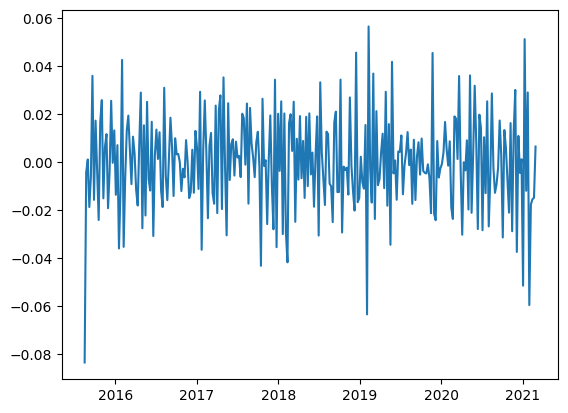

In [4]:
import matplotlib.pyplot as plt

# Using differencing to detrend the data

x = time_series_df.INJURIES_TOTAL.resample('W').mean()
plt.plot(x.diff())

## Your explanations here
For this part, I decided to look at the time series data for the total amount of injuries reported for a car crash. Without detrending the data, It does seem like more injuries tend to have during the mid point of the year. This is in the summertime, so it does make sense to me as more people are out and about because of the nicer weather. Additionally, students are off from school so there are more young drivers on the streets as well. For this plot, I resampled based on weeks from INJURIES_TOTAL and then took the means of the resample data. I ploted these means against the times to give the plot.

To detrend this time series, I used to differencing method. I took the means from the resampled data and applied the differencing method on it. I then plotted this differenced and detrended data on a plot with the time on the x axis. From the detrended plot, it is quite difficult to see any sort of relationship. However, I do see that injuries do spike on the low end during the earlier parts of the years.

### 5.4.  Data Analysis question 2. (20 pts)

Has number of deadly crashes increased recently? Look at the data over the years. Can you identify any significant increase/decrease?

<AxesSubplot: xlabel='DATE_POLICE_NOTIFIED'>

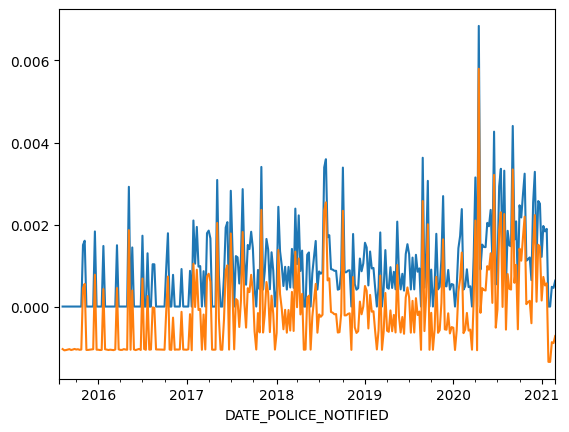

In [5]:
#your code here
# REFERENCE FOR DETRENDING
# https://www.youtube.com/watch?v=aYiUjaxeghk

time_series_df.INJURIES_FATAL.resample('W').mean().plot()

# Getting rid of all rows that have NaN in them and creating a new dataframe based off this
time_series_df = time_series_df.dropna(subset=['INJURIES_FATAL'])

from scipy import arange
from scipy.signal import detrend

time_series_df['INJURIES_FATAL'] = detrend(time_series_df['INJURIES_FATAL'])

time_series_df.INJURIES_FATAL.resample('W').mean().plot()

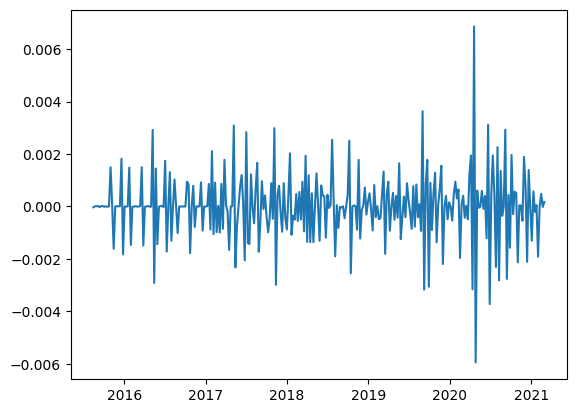

In [6]:
import matplotlib.pyplot as plt

# Using differencing to detrend the data

x = time_series_df.INJURIES_FATAL.resample('W').mean()
plt.plot(x.diff())

## Your explanations here

Without first detrending the data, I believe that there was a small increase of fatal injuries over the years up until 2021. I can see small increase over the years by taking a subset of number of fatal injuries based on weeks. I did in my code by resampling the fatal injuries column by week. I also too the means of this resmaple data so I could get a nicer and more coherent plot. As previously mentioned, from this plot, I was able to see this small uptick in fatal injuries over the years.

However, I also made a plot that used the detrending method of differencing. I used this differencing method to detrend the resample means of fatal injuries. From this new detrended time series graph, I do not really see a massive increase in fatal injuries over time. One could argue there was a large increase from 2020 to 2021, but as a whole, I do not believe there was a substantial increase over the years.

### 5.5.  Data Analysis question 3. (10 pts)

Investigate number and type of injuries based on the speed limit.


<AxesSubplot: xlabel='POSTED_SPEED_LIMIT', ylabel='INJURIES_INCAPACITATING'>

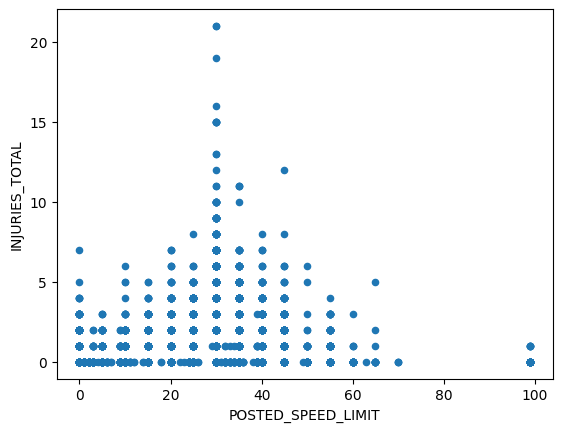

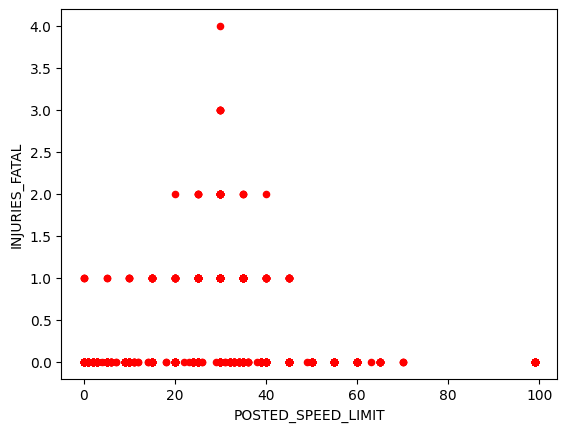

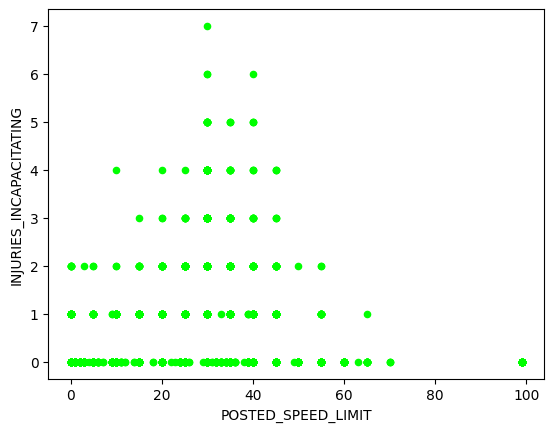

In [7]:
#your code here

dataframe.plot.scatter(x='POSTED_SPEED_LIMIT', y='INJURIES_TOTAL')

dataframe.plot.scatter(x='POSTED_SPEED_LIMIT', y='INJURIES_FATAL', c='red')

dataframe.plot.scatter(x='POSTED_SPEED_LIMIT', y='INJURIES_INCAPACITATING', c='lime')

<AxesSubplot: xlabel='POSTED_SPEED_LIMIT', ylabel='INJURIES_REPORTED_NOT_EVIDENT'>

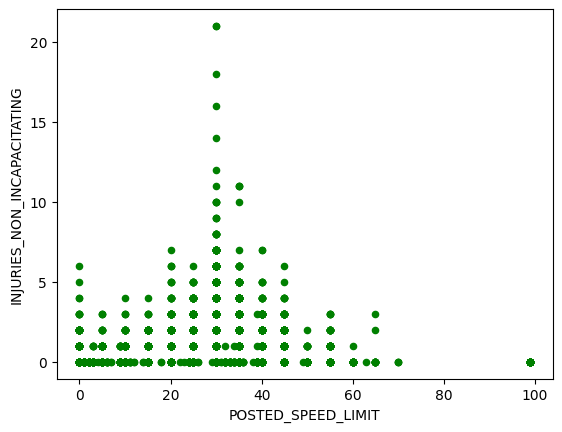

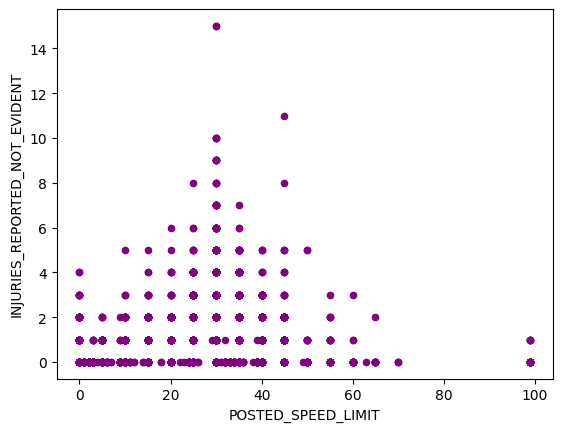

In [8]:
dataframe.plot.scatter(x='POSTED_SPEED_LIMIT', y='INJURIES_NON_INCAPACITATING', c='green')

dataframe.plot.scatter(x='POSTED_SPEED_LIMIT', y='INJURIES_REPORTED_NOT_EVIDENT', c='purple')

## Your explanations here

The first thing I looked at was the total number of injuries vs the speed limit. I plotted these two columns against one another and created a scatter plot. From this scatter plot, I can see that it is approximately a normal distrubtion. From the plot, it seems that the most number of injuries occur around the 30 miles per hour speed limit. This could be due to the fact that the average speed limit is close to that number.

The second thing I looked at was fatal injuries vs the speed limit. I used the same technique of plotting the two columns against themselves on a scatter plot. Once again, I found that the data is normally distributed. We can see that more fatal injuries tend to occur around the 30 miles per hour speed limit. This is most likely to due with 30 mph being the speed limit that has the most total number of injuries. Additionally, I am surprised that were no fatal injuries reported beyond ~50 miles per hour in this dataset.

The third thing I looked at was incapacitating injuries vs the speed limit. I plotted these two columns against one another similarly to the first two plots. I found that incapacitating injuries tended to happen more often around the 30 mph speed limit. However, this distribution does not look normal from the graph. From this, I believe that incapacitating injuries are not really influenced that much by the speed limit.

The fourth think I looked at was non-incapacitating injuries vs the speed limit. I plotted these two columngs again on a scatter plot. Surprisingly, this plot turned out to be approximately normally distrbuted. I thought that the graph was going to be similar to the incapcitating inuries plot given that this is the complement of that one. From the graph, I can say that more non-incapacitating injuries tend to happen around the 30 mph speed limit.

For my last plot, I looked at INJURIES_REPORTED_NOT_EVIDENT vs the speed limit. I plotted these two columns against each other and found some interesting results. It seems that there were more instances of non evident injuries toward the 30 mph speed limit. However, given everything I have looked at previously, this does not make sense. This is ebcause more injuries tend to happen at 30 mph as well. So, I believe this is happening because people usually drive around the 30 mph speed limit, so more accidents tend to happen at that speed limit.

### 5.6.  Data Analysis question 4. (10 pts)
Is there a relationship between hit and run crashes and number of fatal injuries?

Incidents where there was Hit-and-run and fatal injury: 76
Incidents where there was NOT Hit-and-run but fatal injury: 7


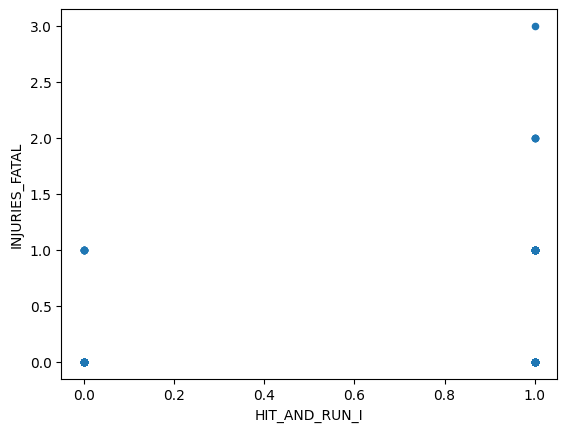

In [24]:
#your code here

dataframe['HIT_AND_RUN_I'] = dataframe['HIT_AND_RUN_I'].replace('Y', 1)
dataframe['HIT_AND_RUN_I'] = dataframe['HIT_AND_RUN_I'].replace('N', 0)

# Getting rid of all rows that have NaN in them and creating a new dataframe based off this
h_r_dataframe = dataframe.dropna(subset=['HIT_AND_RUN_I'])

h_r_dataframe.plot.scatter(x='HIT_AND_RUN_I', y='INJURIES_FATAL')

hr_and_fatal = 0
hr_and_not_fatal = 0
for index, row in h_r_dataframe.iterrows():
    if row['HIT_AND_RUN_I'] == 1 and row['INJURIES_FATAL'] >= 1:
        hr_and_fatal += 1
    elif row['HIT_AND_RUN_I'] == 0 and row['INJURIES_FATAL'] >= 1:
        hr_and_not_fatal += 1
        
print("Incidents where there was Hit-and-run and fatal injury:", hr_and_fatal)
print("Incidents where there was NOT Hit-and-run but fatal injury:", hr_and_not_fatal)

## Your explanations here
I believe that there is a relation between hit-and-run crashes and the number of fatal injuries. In our dataset, we are given a column called HIT_AND_RUN_I which had either the value of Y or N. I coverted Y to 1 and N to 0 in order to plot the HIT_AND_RUN_I column against the INJURIES_FATAL column. INJURIES_FATAL has the number of fatal injuries for a given accident. After plotting the two columns against each other, I found that more fatal injuries usually occur when the car accident is a hit-and-run. This is because the number of fatal injuries range from 0-1 when it is not a hit-and-run. On the other hand, the number of fatal injuries range from 0-3 when the accident is a hit-and-run. I also looped through the data to count how many times hit-and-runs resulted in fatal injuries vs did not. I found the same conclusion from this as well. I found 76 occurences of hit-and-runs causing fatal injuries and only 7 occurences of hit-and-runs not causing fatal injuries.

### 5.7.  Data Analysis question 5. (10 pts)

Do intersection-related crashes result in more fatal injuries?


Incidents where there was intersection and fatal injury: 149
Incidents where there was NOT intersection and fatal injury: 10


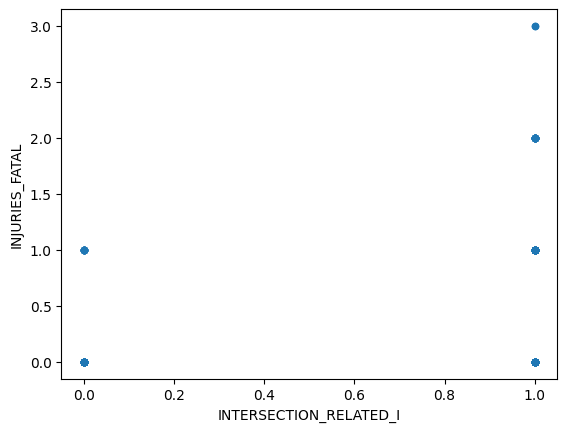

In [23]:
#your code here
dataframe['INTERSECTION_RELATED_I'] = dataframe['INTERSECTION_RELATED_I'].replace('Y', 1)
    
dataframe['INTERSECTION_RELATED_I'] = dataframe['INTERSECTION_RELATED_I'].replace('N', 0)

# Getting rid of all rows that have NaN in the INTERSECTION_RELATED_I coluimn
# Created new dataframe from this
i_r_dataframe = dataframe.dropna(subset=['INTERSECTION_RELATED_I'])

i_r_dataframe.plot.scatter(x='INTERSECTION_RELATED_I', y='INJURIES_FATAL')

i_and_fatal = 0
i_and_not_fatal = 0
for index, row in i_r_dataframe.iterrows():
    if row['INTERSECTION_RELATED_I'] == 1 and row['INJURIES_FATAL'] >= 1:
        i_and_fatal += 1
    elif row['INTERSECTION_RELATED_I'] == 0 and row['INJURIES_FATAL'] >= 1:
        i_and_not_fatal += 1
        
print("Incidents where there was intersection and fatal injury:", i_and_fatal)
print("Incidents where there was NOT intersection and fatal injury:", i_and_not_fatal)

## Your explanations here
Yes, I also believe that there is a relationship between intersection related incidents and the number of fatal injuries. I used the same method that I did for analyzing hit-and-runs and fatal injuries. This is because INTERSECTION_RELATED_I also only had Y or N values. So, once again, I converted the Y's to 1's and the N's to 0's. This was so I could plot them against INJURIES_FATAL which already has numerical values. I also got rid of any rows that had a NaN value. I also looped through the data to count how many times intersections resulted in fatal injuries vs did not. I found the same conclusion from this as well. I found 149 occurences of intersections causing fatal injuries and only 10 occurences of intersections not causing fatal injuries.

### 5.8.  Other Data Analysis questions. (10 pts)

Come up with at least two more interesting insights and visualize them. (Suggestions: Season/weather/road condition and fatalities, or hit and run, having right of the way ... } )


Incidents where there was NOT_RIGHT_OF_WAY and fatal injury: 37
Incidents where there was RIGHT_OF_WAY and fatal injury: 7


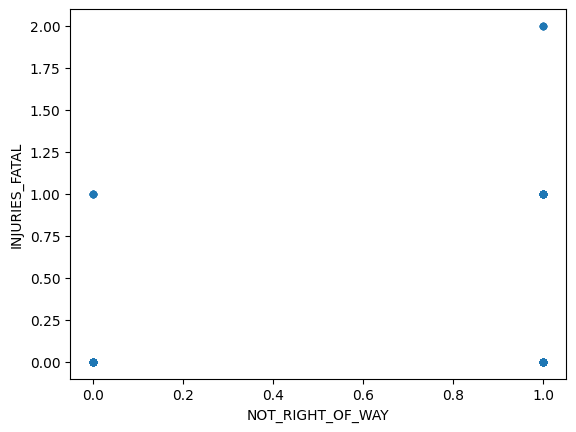

In [22]:
#your code here

dataframe['NOT_RIGHT_OF_WAY'] = dataframe['NOT_RIGHT_OF_WAY'].replace('Y', 1)
dataframe['NOT_RIGHT_OF_WAY'] = dataframe['NOT_RIGHT_OF_WAY'].replace('N', 0)

nrw_dataframe = dataframe.dropna(subset=['NOT_RIGHT_OF_WAY'])

nrw_dataframe.plot.scatter(x='NOT_RIGHT_OF_WAY', y='INJURIES_FATAL')

nrw_and_fatal = 0
nrw_and_not_fatal = 0
for index, row in nrw_dataframe.iterrows():
    if row['NOT_RIGHT_OF_WAY'] == 1 and row['INJURIES_FATAL'] >= 1:
        nrw_and_fatal += 1
    elif row['NOT_RIGHT_OF_WAY'] == 0 and row['INJURIES_FATAL'] >= 1:
        nrw_and_not_fatal += 1
        
print("Incidents where there was NOT_RIGHT_OF_WAY and fatal injury:", nrw_and_fatal)
print("Incidents where there was RIGHT_OF_WAY and fatal injury:", nrw_and_not_fatal)

NOT_RIGHT_OF_WAY
0.0    23.778398
1.0    18.419246
Name: POSTED_SPEED_LIMIT, dtype: float64


C:\Users\exide\AppData\Local\Temp\ipykernel_15972\3539467247.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = nrw_dataframe.groupby('NOT_RIGHT_OF_WAY').mean()


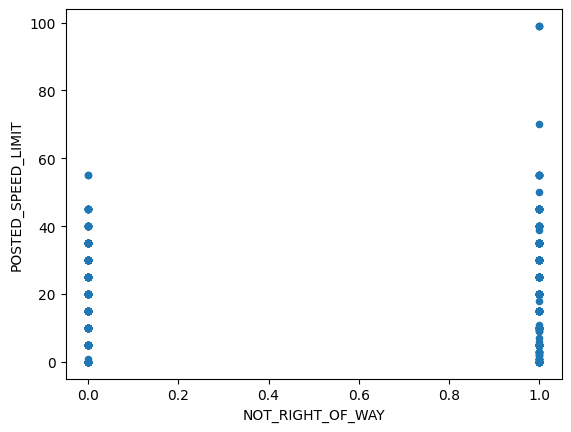

In [21]:
# Yes becomes 1, No becomes 0 in dataframe
dataframe['NOT_RIGHT_OF_WAY'] = dataframe['NOT_RIGHT_OF_WAY'].replace('Y', 1)
    
dataframe['NOT_RIGHT_OF_WAY'] = dataframe['NOT_RIGHT_OF_WAY'].replace('N', 0)

# Getting rid of all the rows that have NaN
nrw_dataframe = dataframe.dropna(subset=['NOT_RIGHT_OF_WAY'])

nrw_dataframe.plot.scatter(x='NOT_RIGHT_OF_WAY', y='POSTED_SPEED_LIMIT')

# Getting the means of column values based of the values of NOT_RIGHT_OF_WAY 
new_df = nrw_dataframe.groupby('NOT_RIGHT_OF_WAY').mean()

# Printing the means of POSTED_SPEED_LIMIT for not right of way or right of way 
print(new_df['POSTED_SPEED_LIMIT'])

## Your explanations here
For my first analysis, I looked if there is a relationship between NOT_RIGHT_OF_WAY and INJURIES_FATAL. First, I cleaned the data for NOT_RIGHT_OF_WAY by turning all the Y's to 1's and N's to 0's. This was so I could plot the data. I also dropped all the rows that had NaN in NOT_RIGHT_OF_WAY. From the plot, I can see that people that did have the right of way, have a range of fatal injuries from 0-1. On the other hand, people that did not have the right of way have a range of fatal injuries from 0-2. Additionally, I saw that there were 37 incidents where there was not right of way and fatal injuries. However, there were only 7 incidents where there was right of way and fatal injuries. So, I believe that if there is not right of way, there is more fatal injuries on average.

For my second analysis, I looked if there is a relationship between NOT_RIGHT_OF_WAY and POSTED_SPEED_LIMIT. First, I cleaned the data for NOT_RIGHT_OF_WAY by turning all the Y's to 1's and N's to 0's. This was so I could plot the data. I also dropped all the rows that had NaN in NOT_RIGHT_OF_WAY. From the plot, I can see that people that have the right of way have a smaller range of speed limits compared to people that do not have the right of way. Additionally, I calculated the mean speed limits for when people have the right of way and when they did not. For people with right of way, the average speed limit was 23.77. For people without the right of way, the speed limit was 18.41. This was interesting to me because I believe now that people that get into car accidents and have the right of way tend to be on average slower than people that do have the right of way and get into car accidents.